In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("haberman.csv")

In [5]:
df.columns=["Age","Year","Nodes","Survival"]

In [6]:
df.head()

,Age,Year,Nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


## Agenda : Given a Patient with some Age, Year of Operation and the Lymph Nodes detected, we have to predict the chances of patient living for 5 years or more than that.



In [7]:
df.shape

(305, 4)

In [8]:
df.isnull().sum()

Age         0
Year        0
Nodes       0
Survival    0
dtype: int64

In [9]:
df.duplicated().value_counts()

False    288
True      17
Name: count, dtype: int64

##### we will not remove duplicates as it can be a genuine possibility.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Age       305 non-null    int64
 1   Year      305 non-null    int64
 2   Nodes     305 non-null    int64
 3   Survival  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [11]:
df.Survival.value_counts()

Survival
1    224
2     81
Name: count, dtype: int64

In [12]:
df=df.replace([1,2],[0,1])

In [13]:
df.Survival.value_counts()

Survival
0    224
1     81
Name: count, dtype: int64

In [14]:
df.describe()

,Age,Year,Nodes,Survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,3.839344,0.265574
std,10.744024,3.254078,7.283978,0.442364
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,0.000000,0.000000
75%,61.000000,66.000000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


###### MIN(AGE)=30, MAX(AGE)=83, Year=(1958,1969), Nodes=[0,52], Survival =[0,1]
##Nodes have higher count density between 0~4(75%)

# UNIVARIATE ANALYSIS

#### 1.Survival

In [15]:
df.Survival.value_counts()

Survival
0    224
1     81
Name: count, dtype: int64

In [16]:
df.Survival.value_counts(1)

Survival
0    0.734426
1    0.265574
Name: proportion, dtype: float64

###### There are only maximum 27 people who will be able to live less than 5 years, which means the dataset is imbalanced.

<Axes: xlabel='Survival', ylabel='count'>

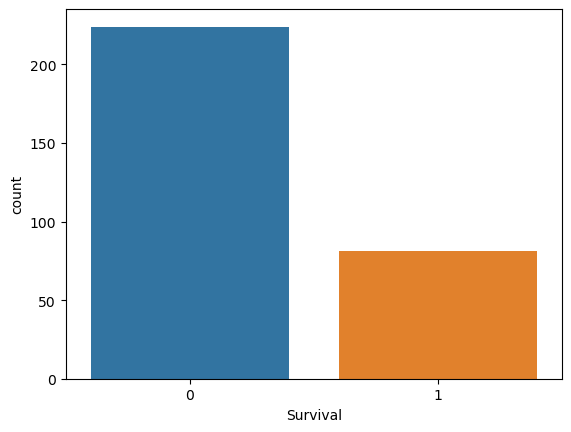

In [19]:
sns.countplot(x="Survival", data=df)

###### 2.Age

In [20]:
df.Age.describe()

count    305.000000
mean      52.531148
std       10.744024
min       30.000000
25%       44.000000
50%       52.000000
75%       61.000000
max       83.000000
Name: Age, dtype: float64

0.15898611605406873


<Axes: xlabel='Age', ylabel='Count'>

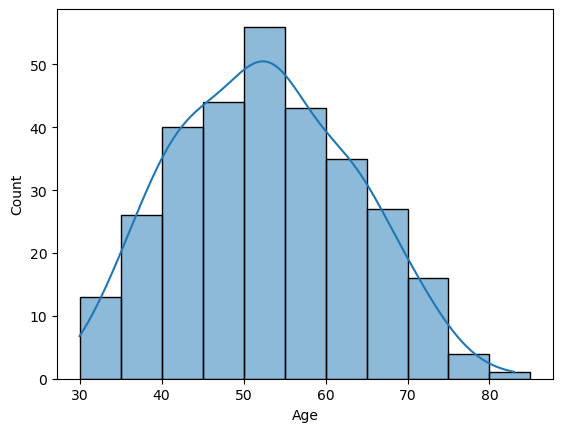

In [21]:
print(df.Age.skew())
sns.histplot(x="Age", data=df, binwidth=5, kde=True)

###### The maximum people who were operated were of the age group 50~55.

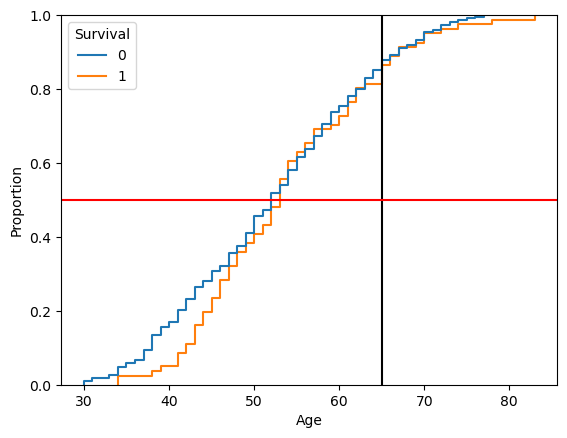

In [26]:
sns.ecdfplot(x='Age', data=df, hue='Survival')
plt.axvline(65, c='Black')
plt.axhline(0.5,c='Red')

###### Nearly 80% of the people were of 65 years or below.

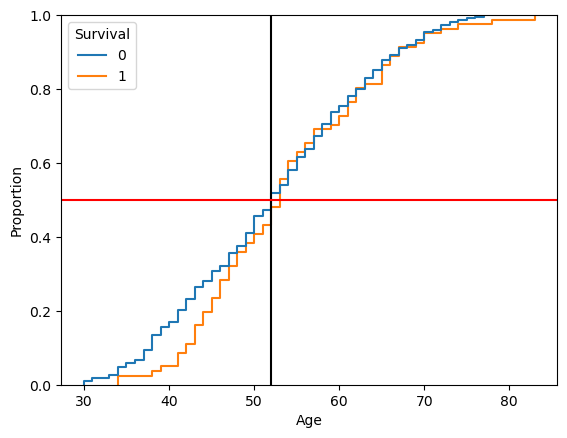

In [27]:
sns.ecdfplot(x='Age', data=df, hue='Survival')
plt.axvline(52, c='Black')
plt.axhline(0.5,c='Red')

###### Nearly 50% of the people were of 52 years or below.

##### 3.Operation Year

In [28]:
df.Year.value_counts()

Year
58    36
64    30
63    30
65    28
60    28
66    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: count, dtype: int64

<Axes: xlabel='Year'>

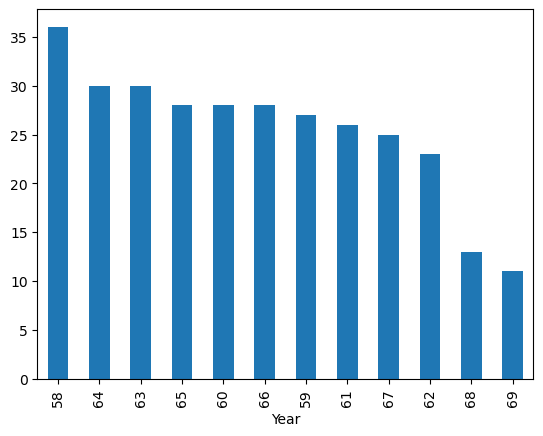

In [30]:
df.Year.value_counts().plot(kind="bar")

##### 4.Lymph Nodes

<Axes: xlabel='Nodes'>

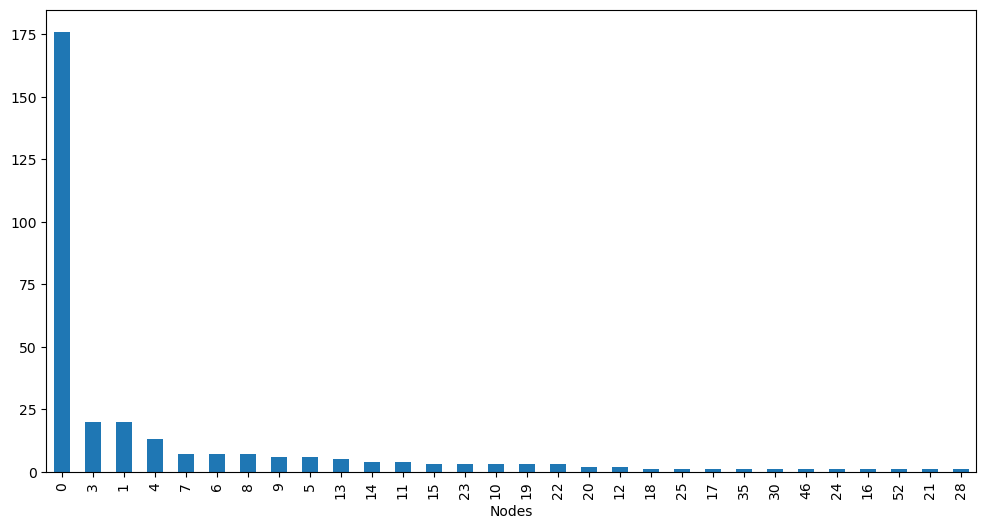

In [31]:
plt.figure(figsize=(12,6))
df.Nodes.value_counts().plot(kind="bar")

2.940405369162834


<Axes: xlabel='Nodes', ylabel='Count'>

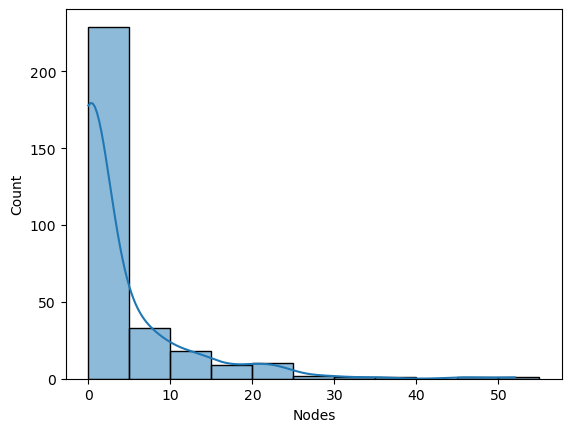

In [32]:
print(df.Nodes.skew())
sns.histplot(x="Nodes", data=df, binwidth=5, kde=True)

###### Maximum density count of nodes is between 0~10.

## BIVARIATE ANALYSIS

#1.Age-Survival,
#2.Age-Nodes-Survival,
#3.Nodes-Survival
#4.Year-Survival,
#5.Age-Nodes,
#6.Year-Nodes,
#7.Age-Years

##### 1.Age-Survival

<Axes: xlabel='Survival', ylabel='Age'>

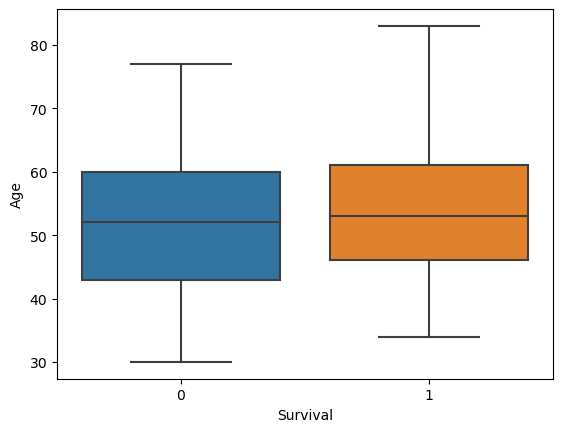

In [33]:
sns.boxplot(x='Survival',y='Age',data=df)

###### People with age greater than 75 will actually live lesser than 5 years.
###### People with age lesser than 35 will actually live grester than 5 years.

Text(0.5, 1.0, 'PDF for age count')

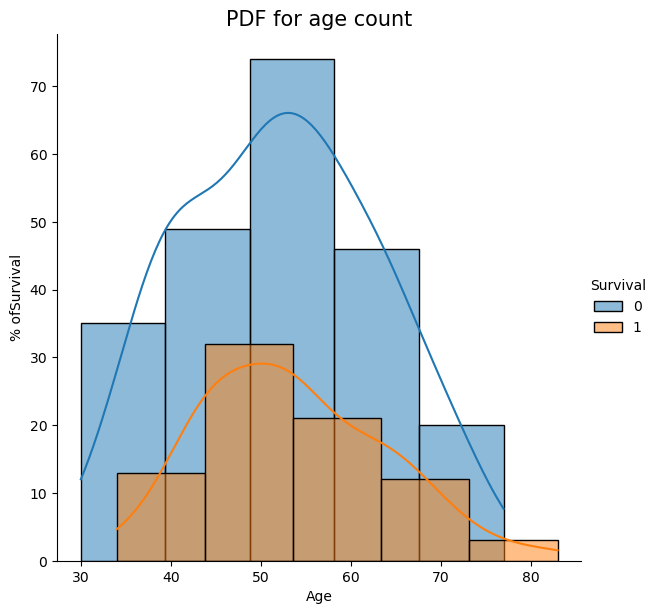

In [36]:
sns.FacetGrid(df, hue='Survival', height=6).map(sns.histplot,'Age',bins=5, kde=True).add_legend()
plt.xlabel('Age')
plt.ylabel('% ofSurvival')
plt.title('PDF for age count',size=15)

###### Maximum % of people living lesser than 5 years are between 45~55.


##### Maximum % of people living more than 5 years are between 30~33.

###### People with age >77 will actually live lesser than 5 years.

In [39]:
df.groupby('Age')['Survival'].sum().sort_values(ascending=False)

Age
53    6
46    4
43    4
65    4
54    4
52    4
47    3
61    3
45    3
44    3
48    3
41    3
57    3
62    3
50    2
49    2
56    2
51    2
55    2
42    2
66    2
67    2
70    2
34    2
60    2
69    1
72    1
74    1
63    1
78    1
83    1
59    1
39    1
38    1
36    0
33    0
77    0
76    0
75    0
35    0
73    0
71    0
58    0
37    0
68    0
40    0
31    0
64    0
30    0
Name: Survival, dtype: int64

In [41]:
df.Age.value_counts().sort_values(ascending=False)

Age
52    14
54    13
50    12
57    11
53    11
47    11
43    11
65    10
38    10
49    10
41    10
55    10
42     9
45     9
61     9
63     8
59     8
70     7
46     7
48     7
44     7
34     7
62     7
56     7
58     7
37     6
51     6
60     6
39     6
67     6
66     5
64     5
72     4
69     4
40     3
31     2
33     2
35     2
36     2
73     2
68     2
30     2
74     2
71     1
75     1
76     1
77     1
78     1
83     1
Name: count, dtype: int64

##### 2.Age-Nodes-Survival

<Figure size 1200x600 with 0 Axes>

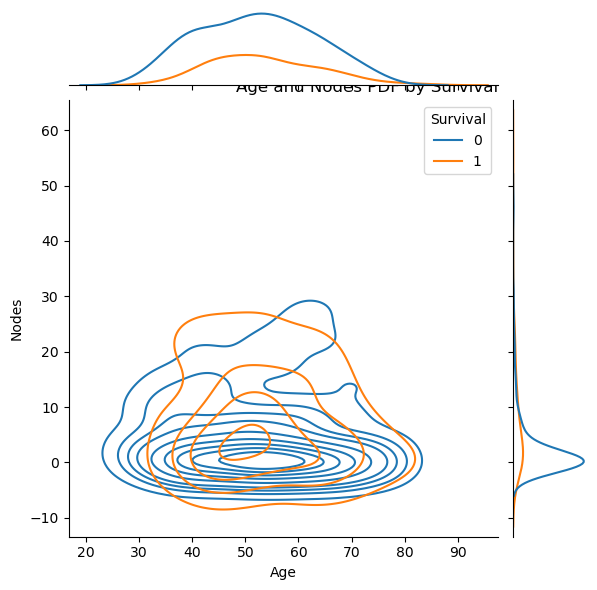

In [48]:
plt.figure(figsize=(12,6))
sns.jointplot(x='Age', y='Nodes', data=df, hue='Survival',kind='kde')
plt.title('Age and Nodes PDF by Survival', loc="Right")
plt.show();

###### Age[43.53] and Nodes[10-52 ] will live lesser than 5 years

##### 3.Nodes- Survival

<Axes: xlabel='Survival', ylabel='Nodes'>

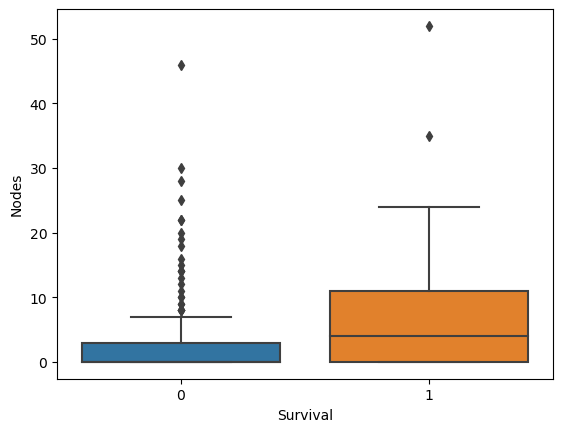

In [49]:
sns.boxplot(x='Survival', y='Nodes', data=df)

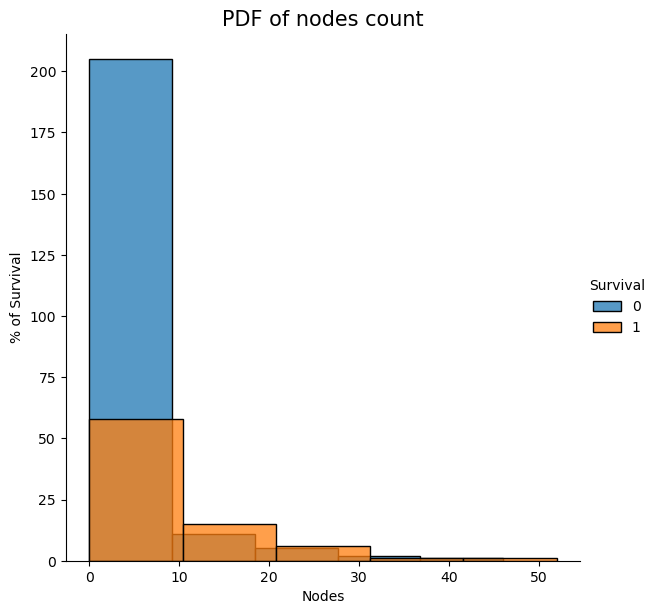

In [53]:
sns.FacetGrid(df,hue='Survival', height=6).map(sns.histplot, 'Nodes', bins=5).add_legend()
plt.xlabel('Nodes')
plt.ylabel('% of Survival')
plt.title('PDF of nodes count',size=15)
plt.show();

In [54]:
df.groupby('Nodes')['Survival'].sum().sort_values(ascending=False)

Nodes
0     27
3      7
1      5
13     4
5      4
9      4
4      3
6      3
23     3
11     3
15     2
19     2
8      2
7      2
24     1
20     1
22     1
21     1
35     1
52     1
17     1
14     1
12     1
10     1
18     0
25     0
28     0
30     0
46     0
16     0
Name: Survival, dtype: int64

In [55]:
df.Nodes.value_counts().sort_values(ascending=False)

Nodes
0     176
1      20
3      20
4      13
7       7
6       7
8       7
9       6
5       6
13      5
14      4
11      4
10      3
22      3
19      3
23      3
15      3
20      2
12      2
18      1
25      1
17      1
35      1
30      1
46      1
24      1
16      1
52      1
21      1
28      1
Name: count, dtype: int64

In [57]:
7/20

0.35

0-15%
1-25%
3-35%
4-23%
5-67%
6-43%
7-29%
8-29%
9-67%
10-33%

13-80%
23-100%

##### 4.Year-Survival

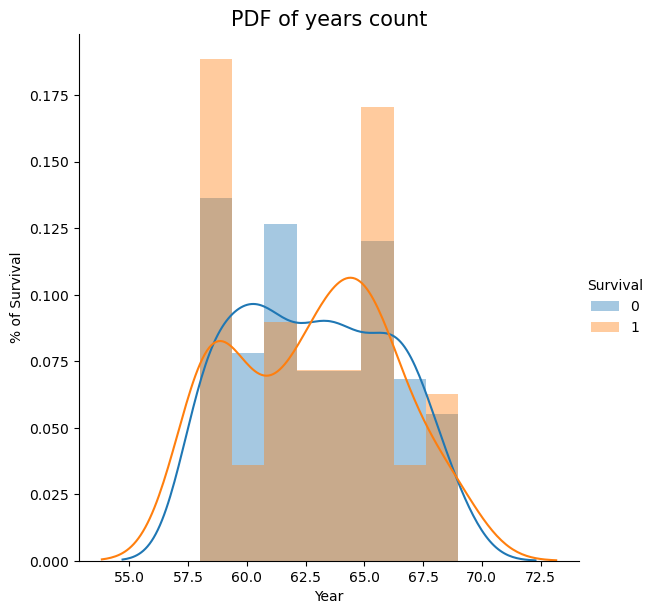

In [63]:
sns.FacetGrid(df,hue='Survival', height=6).map(sns.distplot, 'Year', bins=8, kde=True).add_legend()
plt.xlabel('Year')
plt.ylabel('% of Survival')
plt.title('PDF of years count',size=15)
plt.show();

In [61]:
df.groupby('Survival')['Year'].value_counts().unstack()

Year,58,59,60,61,62,63,64,65,66,67,68,69
Survival,,,,,,,,,,,,
0,24,18,24,23,16,22,22,15,22,21,10,7
1,12,9,4,3,7,8,8,13,6,4,3,4


###### 1965-46%
#1958-33%
#1959-45%
# 33 % people died before 5 years when operated between 1965~1966.

##### 5.Age-Year-Survival

<Figure size 1200x600 with 0 Axes>

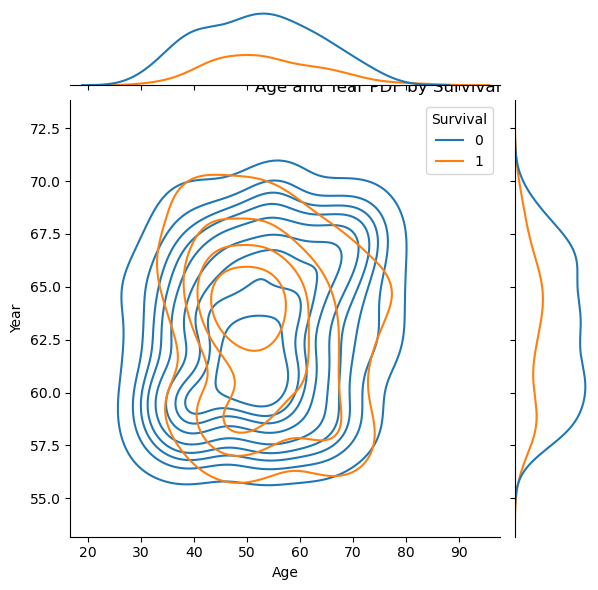

In [66]:
plt.figure(figsize=(12,6))
sns.jointplot(x='Age',y='Year', data=df, hue='Survival',kind='kde')
plt.title('Age and Year PDF by Survival', loc="Right")
plt.show();

## MULTIVARIATE ANALYSIS

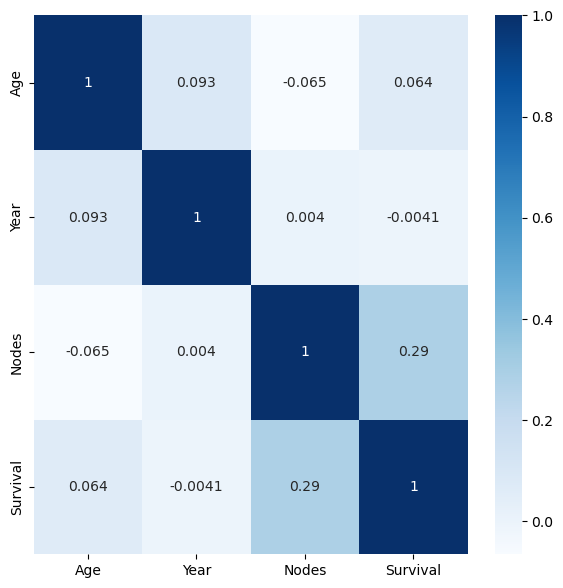

In [68]:
plt.figure(figsize=(7,7))
corr=df.corr()
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns,cmap='Blues', annot=True);

## Nodes and Survival are correlated by 29%.